# Reaction Profile Usage Example

In [23]:
from cmcc_reactions import *
from rdkit import Chem

In [25]:
INPUT_SMILES="OC(=O)C(=C)C=C.C=CC#N>>OC(=O)C1=CCCC(C1)C#N"

In [26]:
profiler = DyNEBProfileGenerator.from_smiles(
    INPUT_SMILES,
    energy_evaluator=AIMNetEnergyEvaluator(mass_weighted=False),
    num_conformers=20,
    atom_mapper="chython",
    # preoptimize="products",
    preoptimize=False,
    images=15,
    spring_constant=100
)

/Users/Mark/Documents/Postdoc/Development/cmccdb-env/lib/python3.9/site-packages/aimnet2calc/__init__.py:17: UserWarning: PySisiphus is not installed. AIMNet2Pysis will not be available.
  warnings.warn('PySisiphus is not installed. AIMNet2Pysis will not be available.')


Found model file: /Users/Mark/Documents/Postdoc/Development/cmccdb-env/lib/python3.9/site-packages/aimnet2calc/assets/aimnet2/aimnet2_wb97m_0.jpt


In [24]:
util.view_mol(profiler.reactants)

In [25]:
util.view_mol(profiler.products)

In [26]:
pgp = profiler.generate_profile()

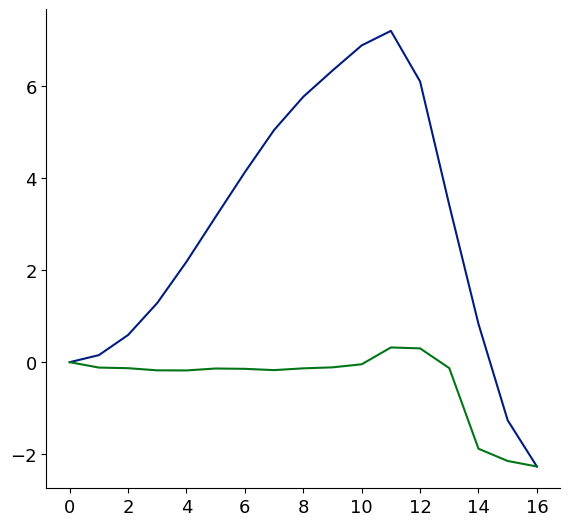

In [27]:
import McUtils.Plots as plt, numpy as np

init_eprof = np.array([pgp.energy_evaluator.calculate_energy(mol) for mol in pgp.initial_profile])
opt_eprof = np.array([pgp.energy_evaluator.calculate_energy(mol) for mol in pgp.optimized_profile])
profile_plot = plt.Plot(
    np.arange(len(init_eprof)),
    init_eprof - init_eprof[0]
)
plt.Plot(
    np.arange(len(opt_eprof)),
    opt_eprof - opt_eprof[0],
    figure=profile_plot
)

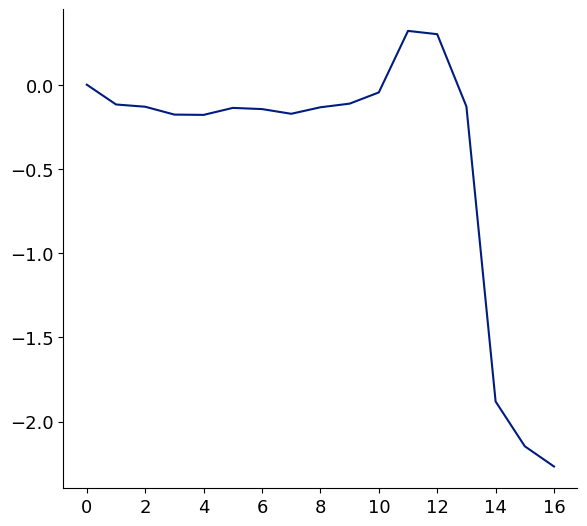

In [28]:
plt.Plot(
    np.arange(len(opt_eprof)),
    opt_eprof - opt_eprof[0]
)

In [30]:
import os

util.export_traj(pgp.initial_profile, os.path.expanduser("~/Documents/Postdoc/Projects/CMCC/init_prof.sdf"))
util.export_traj(pgp.initial_profile, os.path.expanduser("~/Documents/Postdoc/Projects/CMCC/opt_prof.sdf"))

In [10]:
util.view_mol(pgp.initial_profile[0])

In [12]:
util.view_mol(pgp.initial_profile[3])

In [13]:
util.view_mol(pgp.initial_profile[5])

In [14]:
util.view_mol(pgp.initial_profile[7])

In [15]:
from McUtils.Jupyter import MoleculeGraphics

In [17]:
MoleculeGraphics(
    util.get_symbols(pgp.initial_profile[0]),
    [util.get_positions(m) for m in pgp.initial_profile]
)

NGLWidget(max_frame=8)